<div align="center">
<h1>Solar Panal - Regression</h1>
</div>

<h3>1. Import Required Libraries</h3>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

<h3>2. Load the Dataset</h3>

In [12]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Project3\Solar_Panel_Regression-\solarpowergeneration.csv")
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


<h3>3. Basic Info</h3>

In [7]:
print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDescriptive Statistics:\n", df.describe())



Shape of dataset: (2920, 10)

Column Names: ['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed', 'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)', 'power-generated']

Data Types:
 distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object

Missing Values:
 distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                

<h3>a. Check for Duplicates</h3>

In [45]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


<h3>b. Skewness & Kurtosis</h3>

In [48]:
# Check distribution shapes—important for transformations:
df.skew(), df.kurt()


(distance-to-solar-noon         0.211452
 temperature                    0.125916
 wind-direction                -1.629519
 wind-speed                     0.416851
 sky-cover                      0.080284
 visibility                    -3.862446
 humidity                      -0.955607
 average-wind-speed-(period)    0.622910
 average-pressure-(period)      0.441384
 power-generated                1.307035
 dtype: float64,
 distance-to-solar-noon         -0.987306
 temperature                    -0.287402
 wind-direction                  1.856622
 wind-speed                      0.078606
 sky-cover                      -1.341456
 visibility                     15.718494
 humidity                        0.872219
 average-wind-speed-(period)     0.015342
 average-pressure-(period)       0.352309
 power-generated                 0.342206
 dtype: float64)

<h3>c. Target Variable vs Categorical Feature</h3>

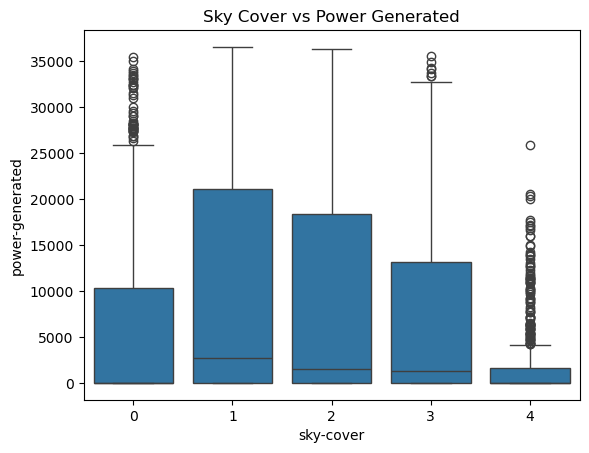

In [53]:
# If any feature (e.g., sky_cover) is ordinal or categorical:
sns.boxplot(x='sky-cover', y='power-generated', data=df)
plt.title("Sky Cover vs Power Generated")
plt.show()


<h3>d. Feature Importance</h3>

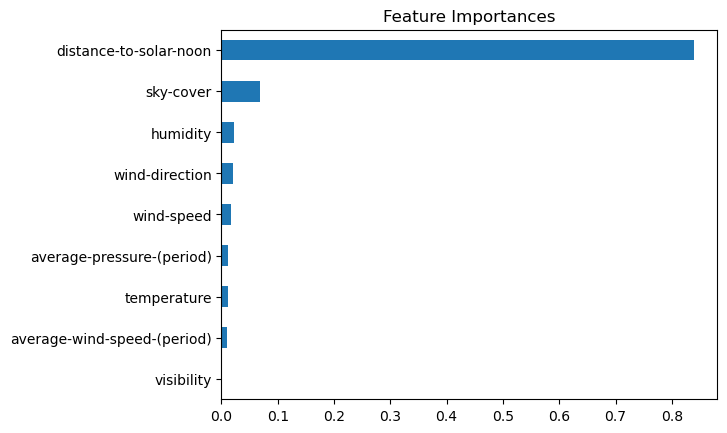

In [60]:
# Use a quick model to see which features matter:
from sklearn.ensemble import RandomForestRegressor

X = df.drop("power-generated", axis=1)
y = df["power-generated"]

model = RandomForestRegressor()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title="Feature Importances")
plt.show()


<h3>e. Check for NaNs and infs</h3>

In [65]:
print("Any NaNs?\n", df.isna().sum())
print("\nAny Infs?\n", np.isinf(df).sum())


Any NaNs?
 distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

Any Infs?
 distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64


In [70]:
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()
df_cleaned

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [72]:
df_filled = df.replace([np.inf, -np.inf], np.nan).fillna(method='ffill')  # or use .fillna(0)


C:\Users\HP\AppData\Local\Temp\ipykernel_19144\2103847345.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.replace([np.inf, -np.inf], np.nan).fillna(method='ffill')  # or use .fillna(0)


In [74]:
df_cleaned.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

<h3>f. Multicollinearity Check (VIF)</h3>

In [80]:
# Helps detect redundant predictors:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_cleaned.drop("power-generated", axis=1)
X_const = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(X.shape[1])]
print(vif)



                       Feature       VIF
0       distance-to-solar-noon  1.307262
1                  temperature  1.516349
2               wind-direction  1.304085
3                   wind-speed  2.240697
4                    sky-cover  1.351085
5                   visibility  1.245484
6                     humidity  1.691701
7  average-wind-speed-(period)  2.063787
8    average-pressure-(period)  1.506847


<h3>4. Target Variable Distribution</h3>

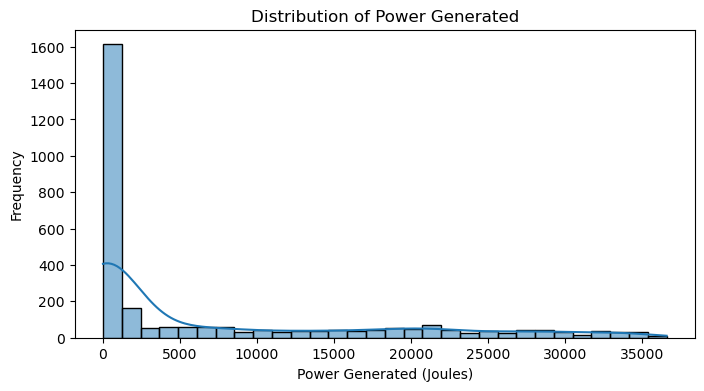

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(df['power-generated'], bins=30, kde=True)
plt.title('Distribution of Power Generated')
plt.xlabel('Power Generated (Joules)')
plt.ylabel('Frequency')
plt.show()



<h3>5. Correlation Heatmap</h3>

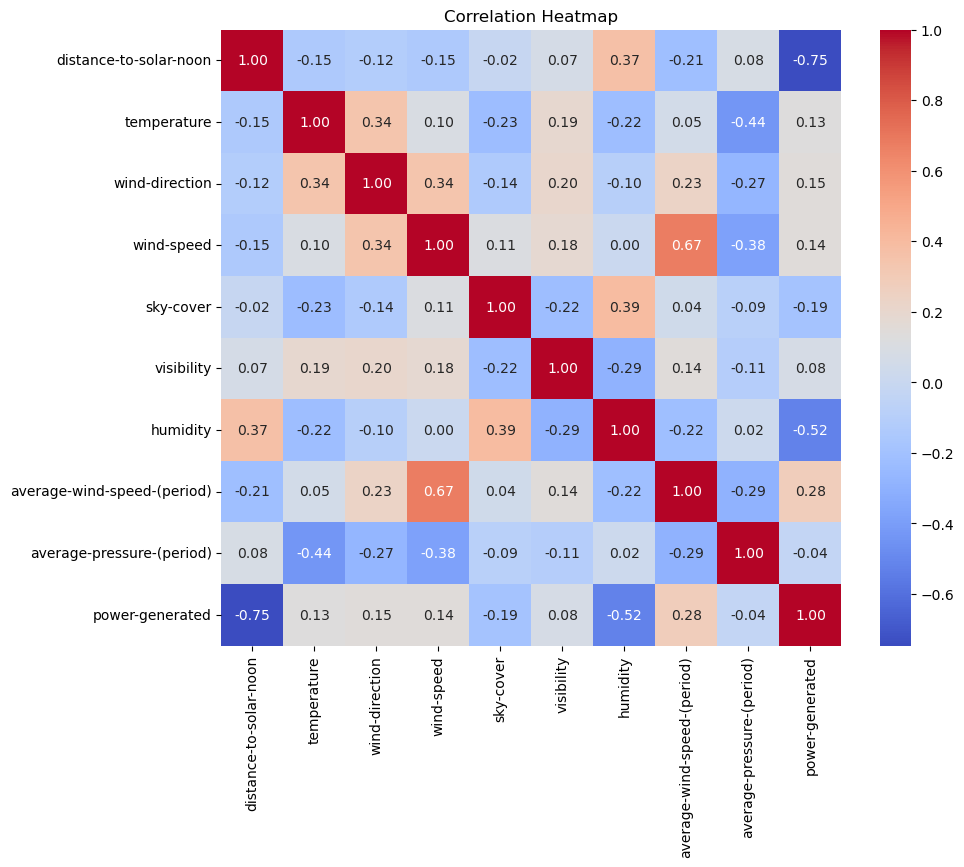

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



<h3>6. Pairplot of Selected Features</h3>

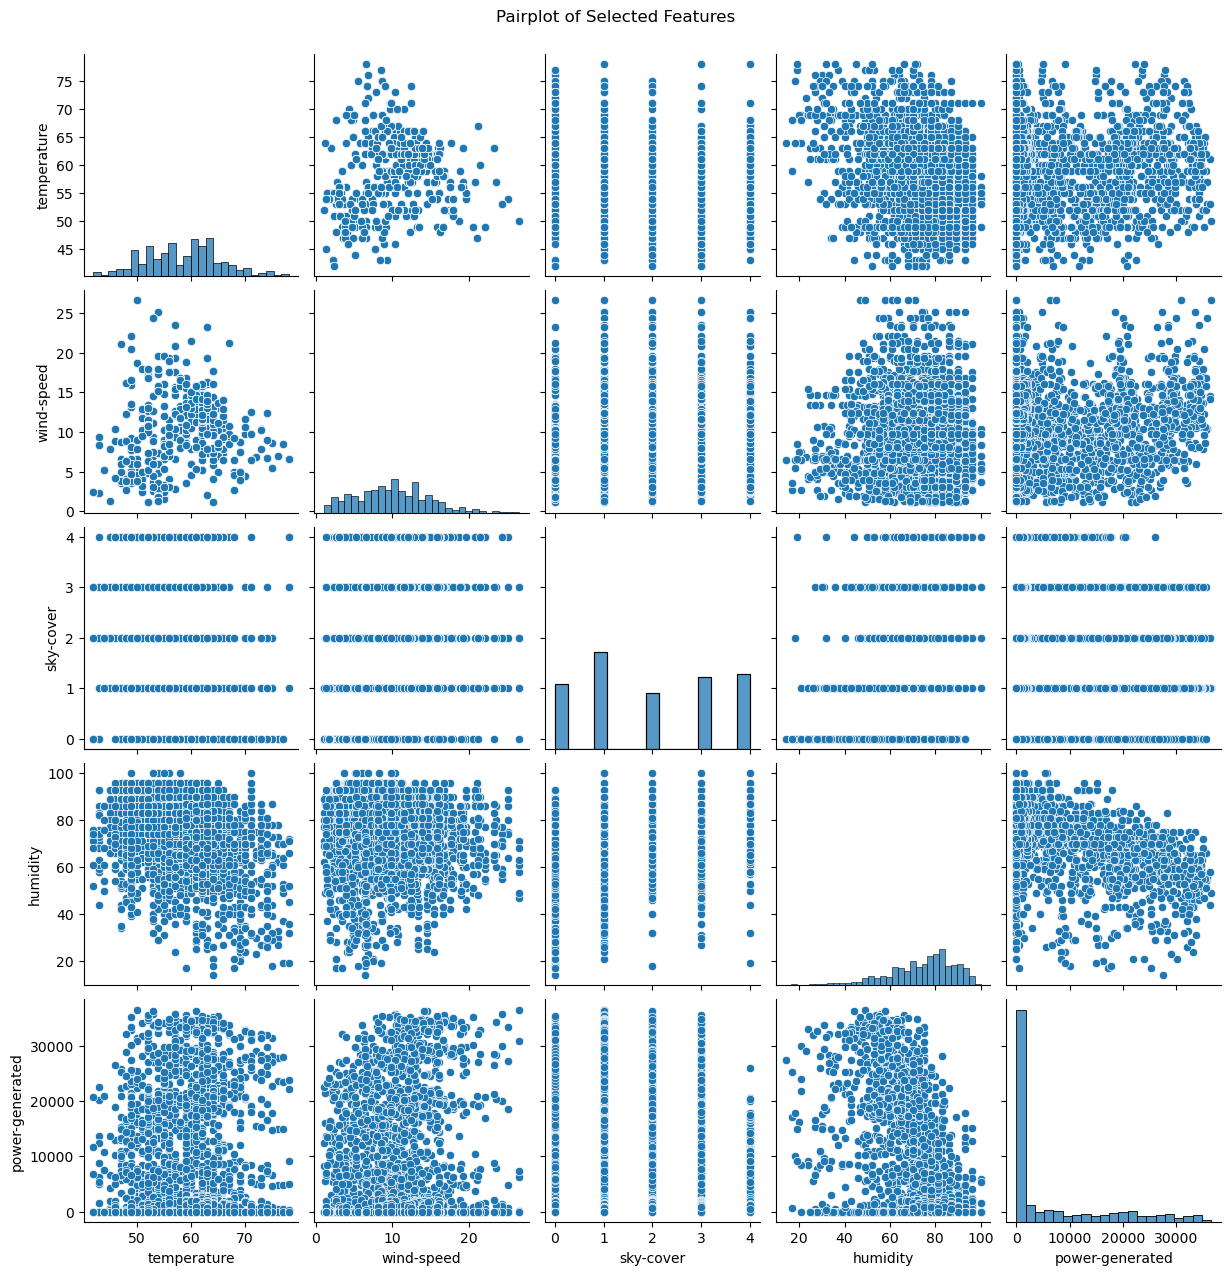

In [26]:
selected_features = ['temperature', 'wind-speed', 'sky-cover', 'humidity', 'power-generated']
sns.pairplot(df[selected_features])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()



<h3>7. Boxplots to Check Outliers</h3>

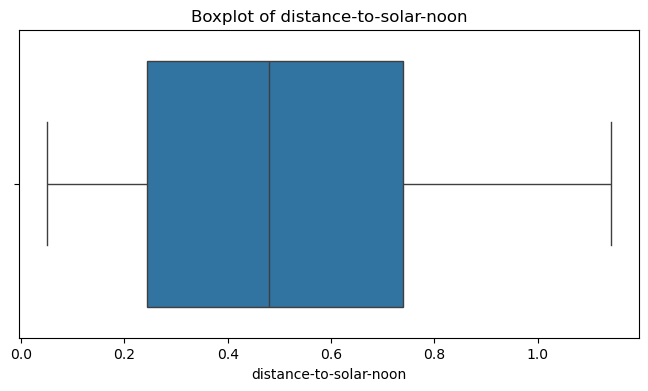

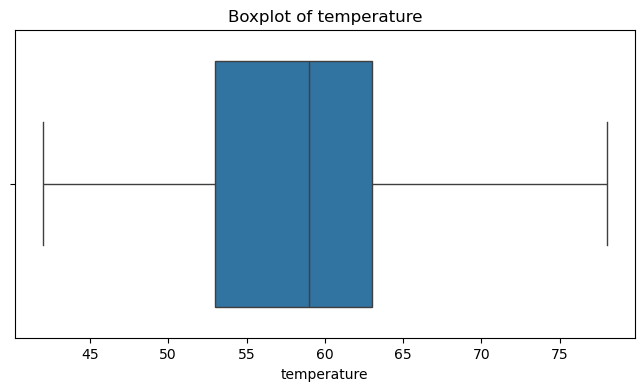

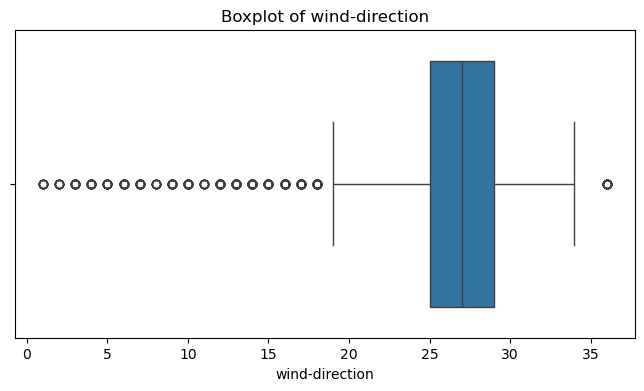

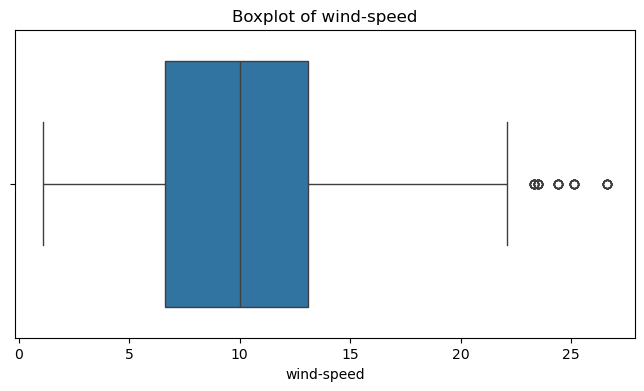

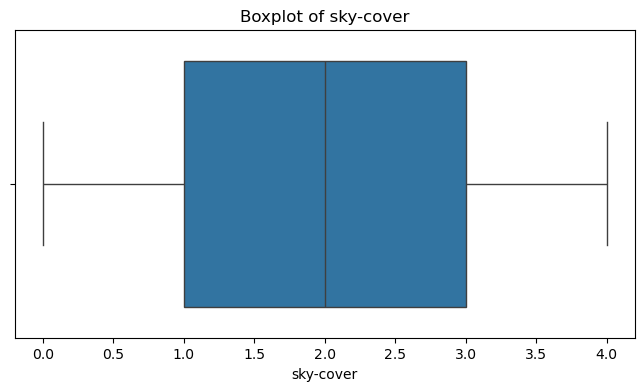

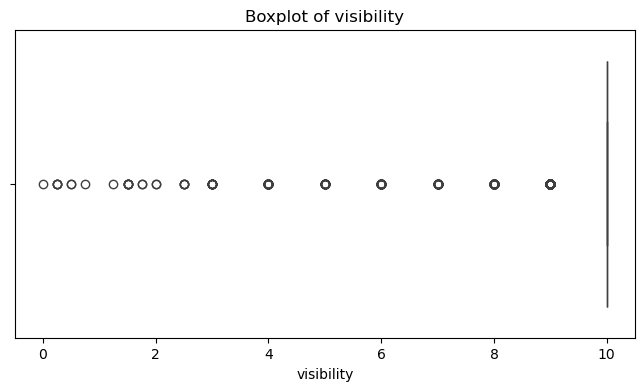

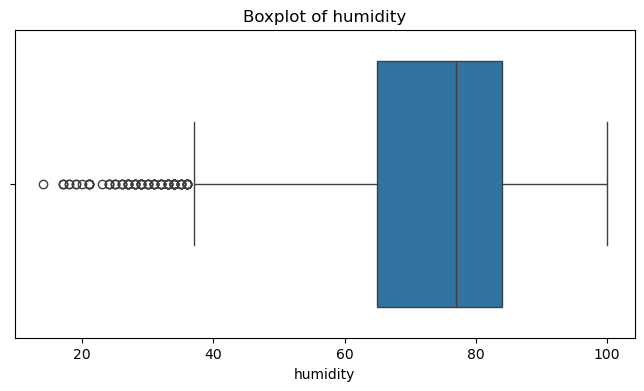

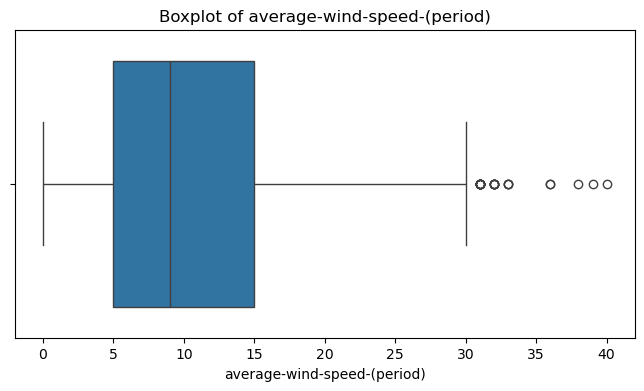

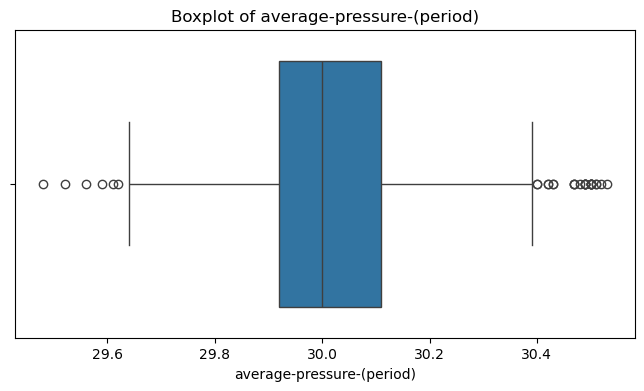

In [31]:
features = df.columns.drop('power-generated')
for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


<h3>8. Relationship with Target Variable</h3>

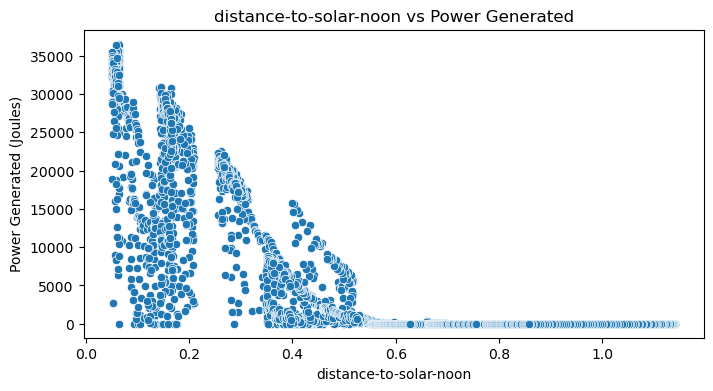

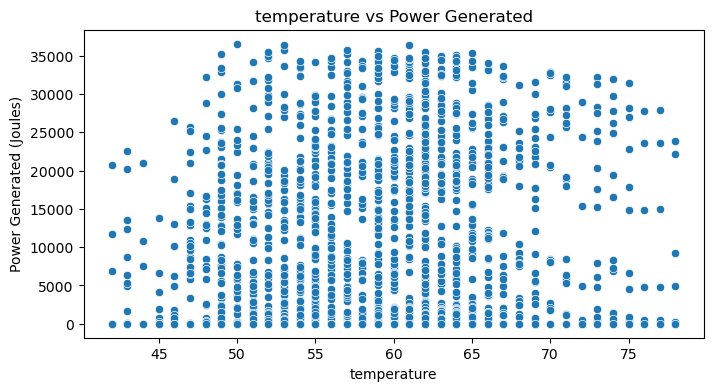

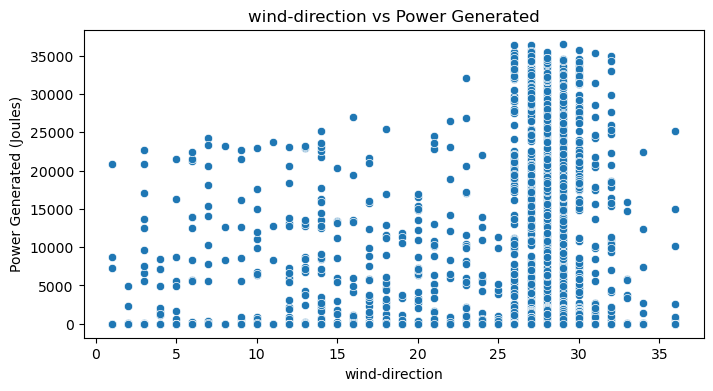

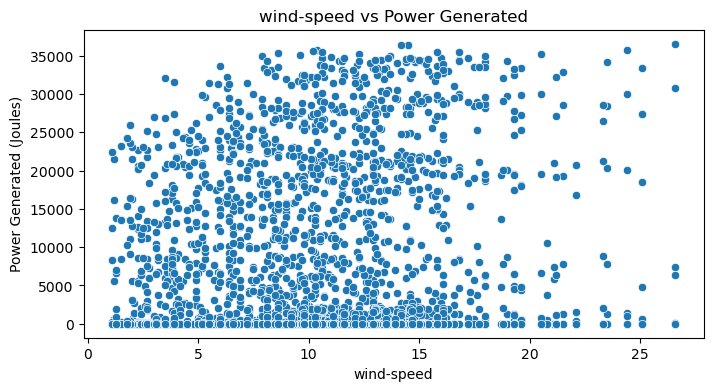

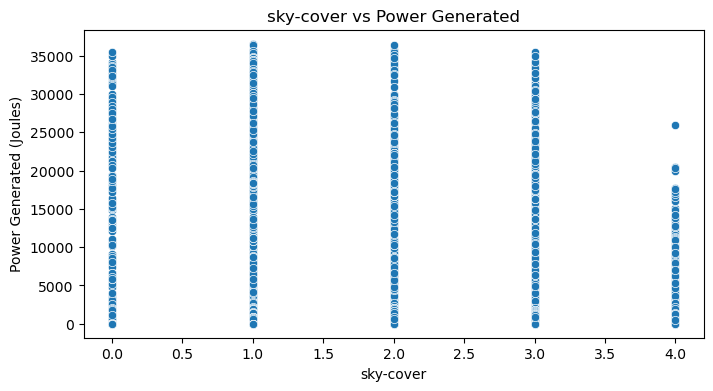

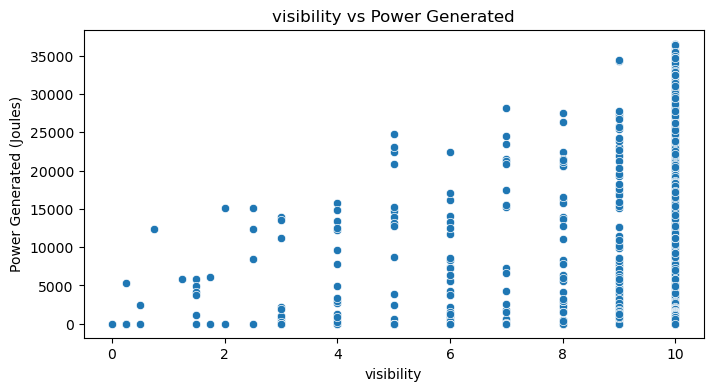

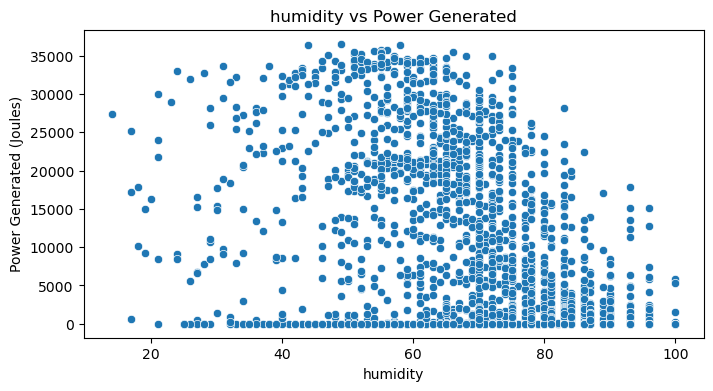

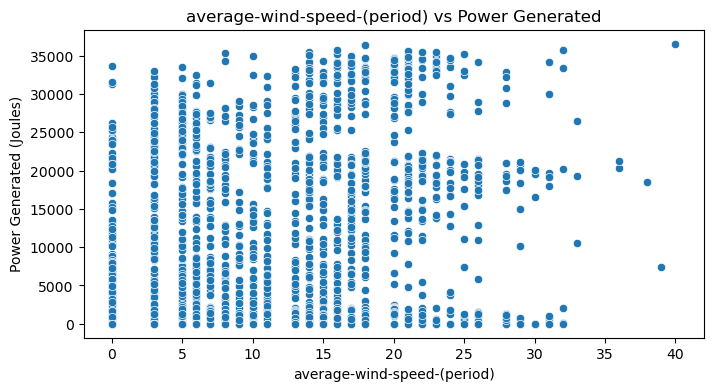

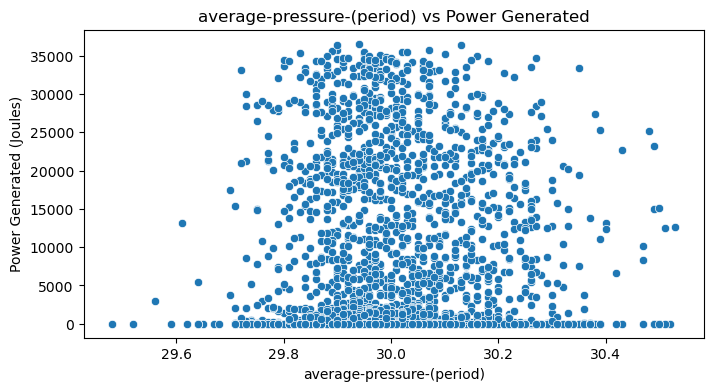

In [36]:
for col in features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[col], y=df['power-generated'])
    plt.title(f'{col} vs Power Generated')
    plt.xlabel(col)
    plt.ylabel('Power Generated (Joules)')
    plt.show()